### 군집화 (Clustering)
- 비지도학습으로 정답 없이, 특징만 가지고 있는 데이터로 모델 구현

### 문제 정의   
: 키와 몸무게로 학생들을 3그룹으로 분류

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [20]:
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


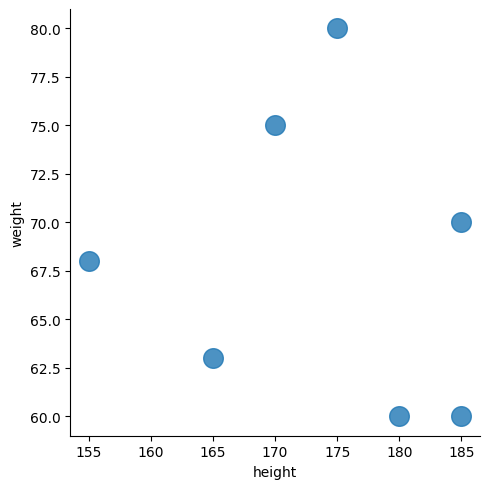

In [23]:
sns.lmplot(x='height',y='weight',data = df, fit_reg=False, scatter_kws={'s':200})
plt.show()

In [24]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [25]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [160.        ,  65.5       ],
       [172.5       ,  77.5       ]])

In [26]:
kmeans.labels_

array([0, 0, 0, 1, 1, 2, 2], dtype=int32)

In [27]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = kmeans.labels_
df.head()

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,1
4,155,68,1


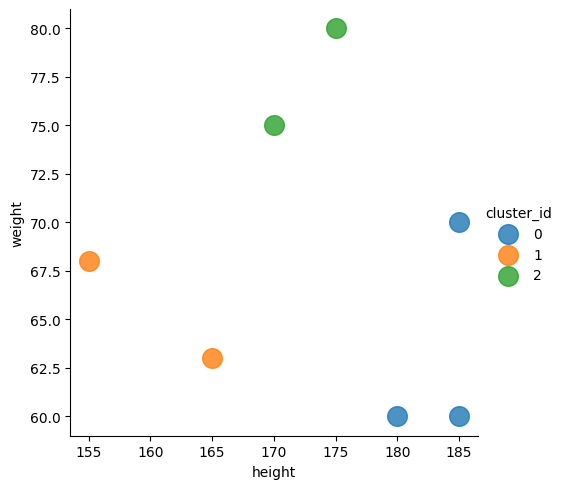

In [28]:
sns.lmplot(
    x='height',
    y='weight',
    hue='cluster_id',
    data=df,
    fit_reg=False, 
    scatter_kws={'s':200}
)
plt.show()

---
### iris

In [29]:
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris['label'] = iris['Name'].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [33]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [43]:
iris2['cluster_id'] = kmeans.labels_
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


KeyError: "None of [Index([None, None], dtype='object')] are in the [columns]"

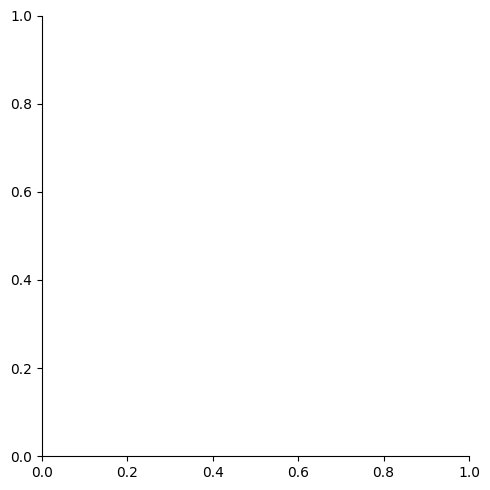

In [44]:
sns.lmplot(
    
    hue='cluster_id',
    data=iris2,
    fit_reg=False, 
    scatter_kws={'s':200}
)
plt.show()